<a href="https://colab.research.google.com/github/GutoMayer/ML_Clustering/blob/main/Shopping_center_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste Técnico - Estágio em Auditoria Interna – Data Analytics


Nessa etapa queremos conhecer um pouco da sua capacidade técnica e analítica. <br/>

**Importante:** Não existe certo ou errado na execução desse teste. Queremos entender seu raciocínio.
Sendo assim, o teste não é desclassificatório.

Como base, você pode assistir video aulas, como sugestão:
https://m.twitch.tv/teomewhy/videos

Na Aba "descritivo do teste" você encontrará instruções de como executar o projeto.<br/>

## Descritivo do teste

**Contexto:** <br/>

O time de Real Estate solicitou apoio com as operações de Shoppings Center.<br/>
Um dos nossos parceiros está com problema no gerenciamentos de seus clientes.<br/>
Nossa primeira tarefa é idêntificar o perfil dos clientes para que os responsáveis pela estratégia comercial possam se basear em dados na tomada da decisão.

**Sua Tarefa:** Crie uma clusterização com o dataset disponibilizado no "Step 02" e avalie os grupos criados.

<br/>

**O que está sendo avaliado:**
  
* Organização de código;
* Lógica de programação;
* Habilidade de manipulação de dados;
* Habilidade em Machine Learning;
* Raciocínio - Então é importante registrar o que está pensando.






### Step 1: Load Libraries

In [1028]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


### Step 2: Load the Dataset
Download the dataset from Kaggle

In [1029]:
# Fiz abaixo do dataset details.

#### Step 2.1: Dataset Details
Details of Features are as below:

**Id:** Unique identifier for each individual in the dataset.<br/>
**Year_Birth:** The birth year of the individual.<br/>
**Education:** The highest level of education attained by the individual.<br/>
**Marital_Status:** The marital status of the individual.<br/>
**Income:** The annual income of the individual.<br/>
**Kidhome:** The number of young children in the household.<br/>
**Teenhome:** The number of teenagers in the household.<br/>
**Dt_Customer:** The date when the customer was first enrolled or became a part of the company's database.<br/>
**Recency:** The number of days since the last purchase or interaction.<br/>
**MntWines**: The amount spent on wines.<br/>
**MntFruits:** The amount spent on fruits.<br/>
**MntMeatProducts:** The amount spent on meat products.<br/>
**MntFishProducts:** The amount spent on fish products.<br/>
**MntSweetProducts:** The amount spent on sweet products.<br/>
**MntGoldProds:** The amount spent on gold products.<br/>
**NumDealsPurchases:** The number of purchases made with a discount or as part of a deal.<br/>
**NumWebPurchases:** The number of purchases made through the company's website.<br/>
**NumCatalogPurchases:** The number of purchases made through catalogs.<br/>
**NumStorePurchases:** The number of purchases made in physical stores.<br/>
**NumWebVisitsMonth:** The number of visits to the company's website in a month.<br/>
**AcceptedCmp3:** Binary indicator (1 or 0) whether the individual accepted the third marketing campaign.<br/>
**AcceptedCmp4:** Binary indicator (1 or 0) whether the individual accepted the fourth marketing campaign.<br/>
**AcceptedCmp5:** Binary indicator (1 or 0) whether the individual accepted the fifth marketing campaign.<br/>
**AcceptedCmp1:** Binary indicator (1 or 0) whether the individual accepted the first marketing campaign.<br/>
**AcceptedCmp2:** Binary indicator (1 or 0) whether the individual accepted the second marketing campaign.<br/>
**Complain:** Binary indicator (1 or 0) whether the individual has made a complaint.<br/>
**Z_CostContact:** A constant cost associated with contacting a customer.<br/>
**Z_Revenue:** A constant revenue associated with a successful campaign response.<br/>
**Response:** Binary indicator (1 or 0) whether the individual responded to the marketing campaign.<br/>

In [1030]:
!pip install --upgrade kagglehub

In [1031]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vishakhdapat/customer-segmentation-clustering")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/vishakhdapat/customer-segmentation-clustering/versions/1


In [1032]:
import os

print("Arquivos no diretório:", os.listdir(path))

Arquivos no diretório: ['customer_segmentation.csv']


In [1033]:
df = pd.read_csv(os.path.join(path, 'customer_segmentation.csv'))
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Step 3: Exploratory Data Analysis (EDA)
Perform the following tasks:
- Understand the structure of the dataset.
- Check for missing values and handle them appropriately.
- Generate summary statistics for numerical columns.

In [1034]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [1035]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [1036]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [1037]:
df.describe() # verificar como ta a distribuição, sendo possível identificar alguns outliers de inicio.

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


####Trabalhando com date time e modificando algumas variáveis

In [1038]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = '%d-%m-%Y')
df['Dt_Customer'].head() # Ainda não tenho certeza sobre a utilização dessa variavel, mas vou transformar ela.

,Dt_Customer
0,2012-09-04
1,2014-03-08
2,2013-08-21
3,2014-02-10
4,2014-01-19


In [1039]:
df['Year_Customer'] = df['Dt_Customer'].dt.year
df['Month_Customer'] = df['Dt_Customer'].dt.month
df['Day_Customer'] = df['Dt_Customer'].dt.day
df.head() # transformando

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Month_Customer,Day_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,2012,9,4
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,2014,3,8
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,2013,8,21
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,2014,2,10
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,2014,1,19


In [1040]:
df.drop(columns=['Dt_Customer'], inplace=True) # Para não termos redundância de informação

In [1041]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Month_Customer,Day_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,0,0,0,0,3,11,1,2012,9,4
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,0,0,0,0,3,11,0,2014,3,8
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,0,0,0,0,3,11,0,2013,8,21
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,0,0,0,0,3,11,0,2014,2,10
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,3,11,0,2014,1,19


In [1042]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Year_Customer',
       'Month_Customer', 'Day_Customer'],
      dtype='object')

In [1043]:
df = df.drop(columns=['Z_CostContact', 'Z_Revenue']) # Essas duas variáveis são constantes, então estou removendo. Vão me atrapalhar com os clusters

####Ouliers, nulos, duplicadas e alterações em alguns dados.

<Axes: ylabel='Year_Birth'>

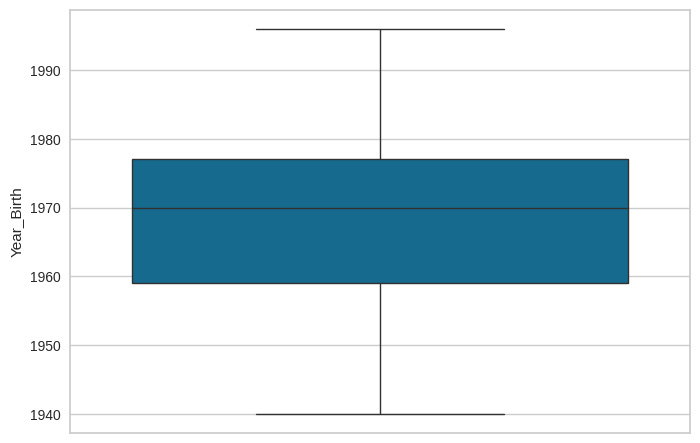

In [1044]:
df = df[df['Year_Birth'] > 1904] # clientes maiores de 120 anos provavelmente são erros de digitação,
                                 # então tiramos para não prejudicar nossos dados
sns.boxplot(df['Year_Birth'])
# Estive refletindo sobre o dataset e ele não parece estar com muitos erros de dados, mas temos alguns outliers.
# embora eu saiba que os clusters são sensíveis a outliers, principalmente quando estamos falando de KMeans, acredito que tirar esses outliers
# poderia prejudicar um pouco nosso entendimento acerca dos dados.

In [1045]:
df['Year_Customer'] = df['Year_Customer'].astype(int) # colocar o ano de registro do cliente como inteiro
df['Year_Customer']

,Year_Customer
0,2012
1,2014
2,2013
3,2014
4,2014
...,...
2235,2013
2236,2014
2237,2014
2238,2014


In [1046]:
df['Age'] = 2024 - df['Year_Birth'] # prefiro usar a idade deles, ao invés da data de nascimento
df['Age']
df.drop(columns=['Year_Birth'], inplace=True)

In [1047]:
df['TotalKids'] = df['Kidhome'] + df['Teenhome'] # prefiro considerar o numero de total de menores de idade sob responsabilidade.

In [1048]:
df['TotalKids']

,TotalKids
0,0
1,2
2,0
3,1
4,1
...,...
2235,1
2236,3
2237,0
2238,1


In [1049]:
# Variável de custo total para termos noção de quantos gastos no total temos. Bom para ver em relação aos ganhos.
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

<Axes: ylabel='MntTotal'>

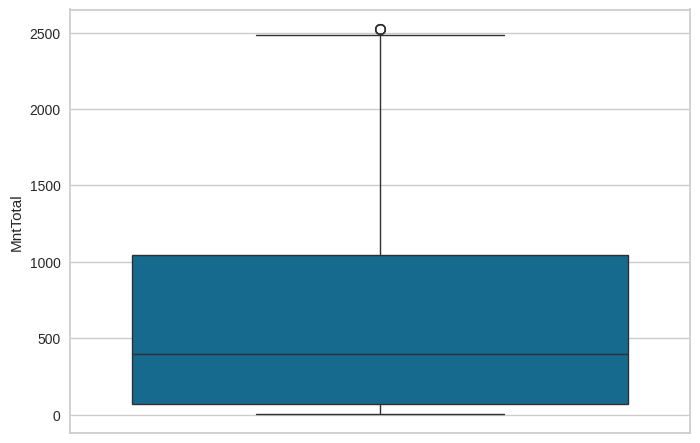

In [1050]:
sns.boxplot(df['MntTotal'])

In [1051]:
# Classifiquei em dois tipos de situação: tem alguém morando junto ou a pessoa mora sozinha.
df['LivingWith'] = df['Marital_Status'].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})

In [1052]:
# Aqui vou contar quantos moradores temos na casa,
df['Moradores'] = df['LivingWith'].replace({"Alone":1, "Partner":2}) + df['TotalKids']

<ipython-input-1052-00720928edb3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Moradores'] = df['LivingWith'].replace({"Alone":1, "Partner":2}) + df['TotalKids']


In [1053]:
df.isnull().sum() # verificando se temos colunas com valores nulos.

,0
ID,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0


In [1054]:
# Vimos que temos 24 valores nulos na coluna income, vamos trabalhar em cima deles, os substituindo pela mediana.
df['Income'].fillna(df['Income'].median(), inplace=True) # como temos uma pessoa ganhando 666mil dolares, achei melhor substituir pela mediana que pela mediana.


<ipython-input-1054-62ae5786aabc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True) # como temos uma pessoa ganhando 666mil dolares, achei melhor substituir pela mediana que pela mediana.


In [1055]:
df.isnull().sum() # limpos

,0
ID,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0


In [1056]:
df['Income'].describe() # pensando sobre esse outlier, acho que vou tirar, ele é muito discrepante...

,Income
count,2237.000000
mean,52227.316495
std,25043.269927
min,1730.000000
25%,35523.000000
50%,51373.000000
75%,68281.000000
max,666666.000000


In [1057]:
df = df[df['Income'] < 600000]
df['Income'].describe()

,Income
count,2236.000000
mean,51952.522809
std,21411.469303
min,1730.000000
25%,35502.500000
50%,51373.000000
75%,68275.750000
max,162397.000000


In [1058]:
# 3 categorias pros dados: graduado, pos graduado ou não graduado
df['Education'] = df['Education'].replace({"Basic":"Undergraduate", "2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

<ipython-input-1058-f8fc5cd3dfa0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education'] = df['Education'].replace({"Basic":"Undergraduate", "2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})


In [1059]:
# se ele tem crianças sob sua responsabilidade, atribui 1, caso contrario atribui 0.
df['IsParent'] = np.where(df.TotalKids > 0, 1, 0)

<ipython-input-1059-e33ad88ebcbe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsParent'] = np.where(df.TotalKids > 0, 1, 0)


In [1060]:
df.duplicated().sum()# verifcando se temos tuplas duplicadas

0

In [1061]:
df.drop_duplicates(inplace=True)

In [1062]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Year_Customer', 'Month_Customer',
       'Day_Customer', 'Age', 'TotalKids', 'MntTotal', 'LivingWith',
       'Moradores', 'IsParent'],
      dtype='object')

In [1063]:
df.drop(columns = ['ID','Marital_Status', 'Year_Customer', 'Month_Customer', 'Day_Customer'], inplace=True) # dando uma reduzida no dataset

In [1064]:
# vou dividir em categoricas e numéricas so para fazer uns gŕaficos de maneira mais facil.
categoricas = df[['Education',
           'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
           'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'LivingWith', 'IsParent']]
numericas = df.drop(columns = categoricas)
print(numericas.columns)
print(categoricas.columns)

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age',
       'TotalKids', 'MntTotal', 'Moradores'],
      dtype='object')
Index(['Education', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'LivingWith',
       'IsParent'],
      dtype='object')


In [1065]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,TotalKids,MntTotal,LivingWith,Moradores,IsParent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,67,0,1617,Alone,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,70,2,27,Alone,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,59,0,776,Partner,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,40,1,53,Partner,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,43,1,422,Partner,3,1


#### Gráficos

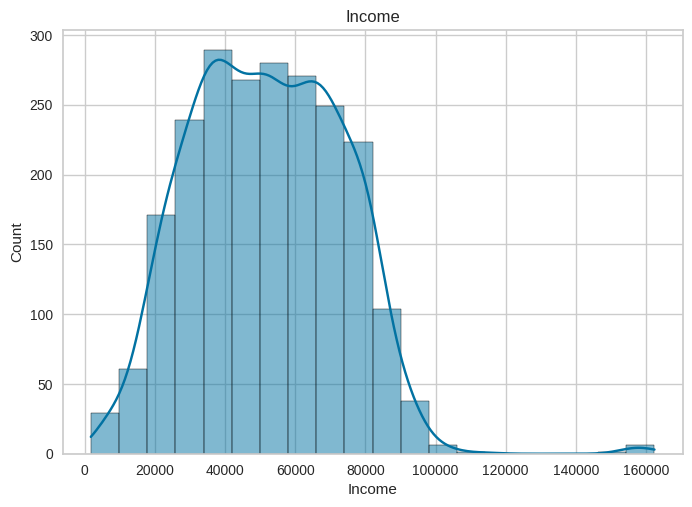

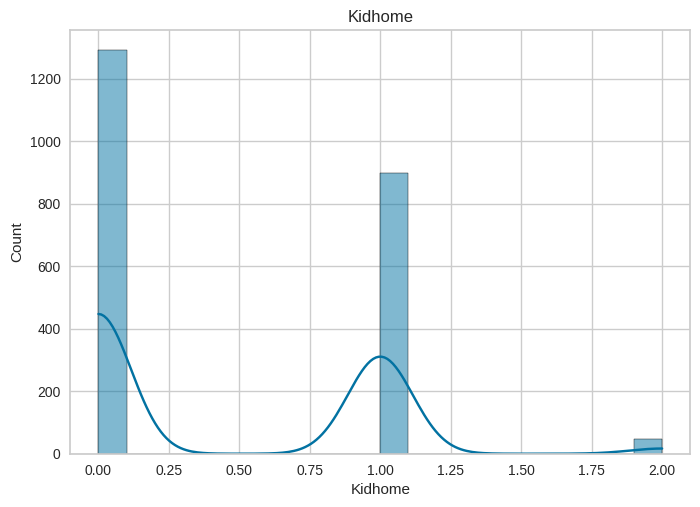

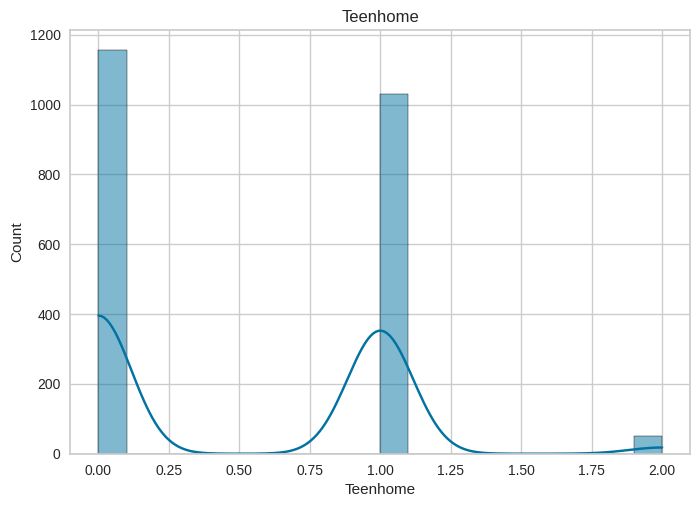

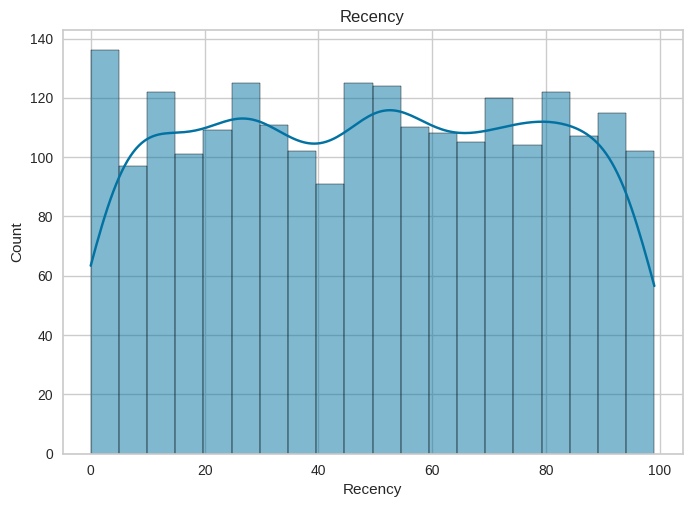

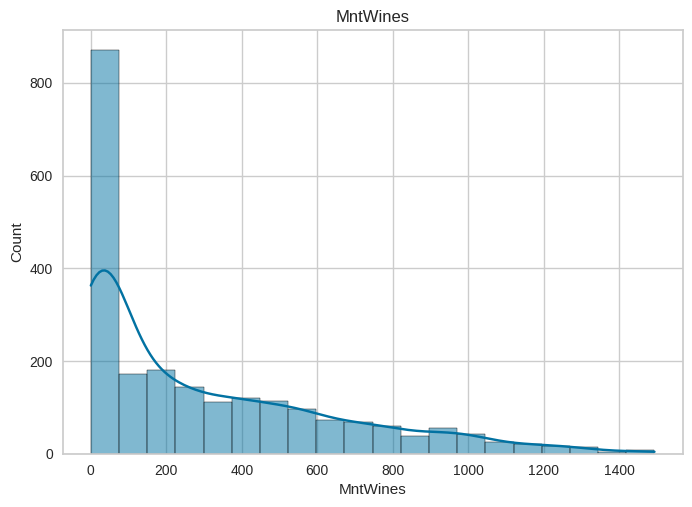

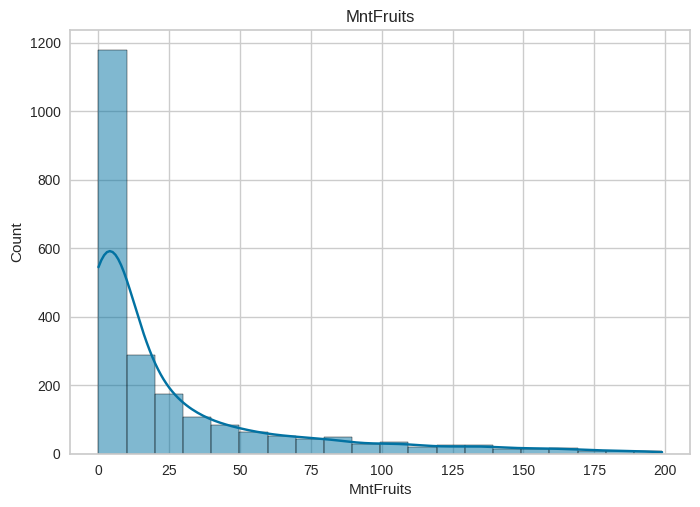

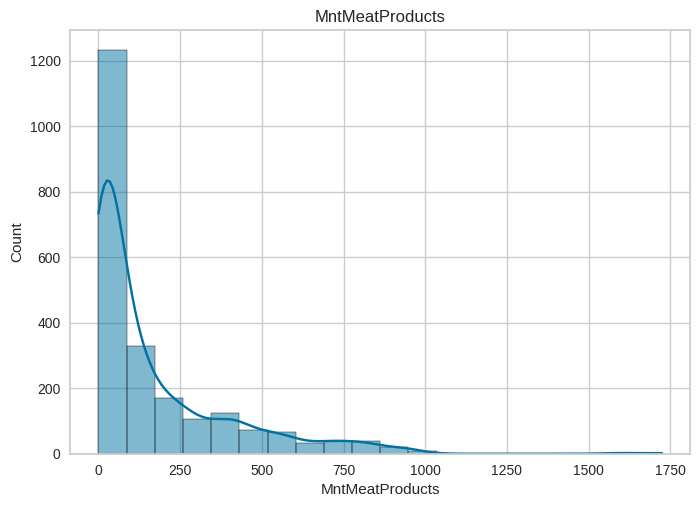

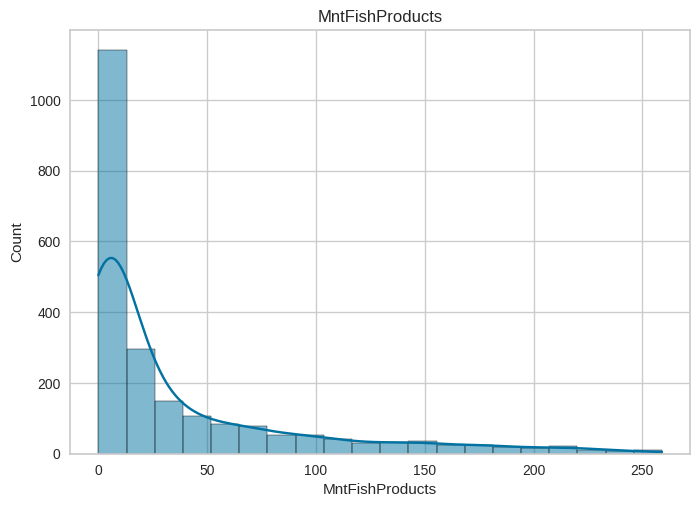

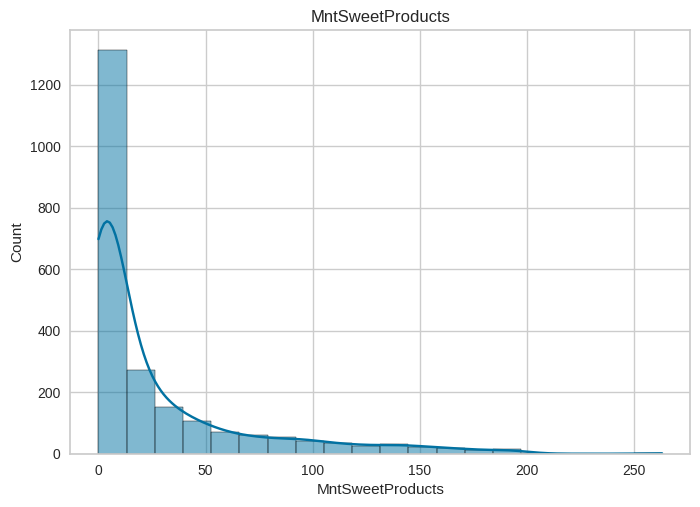

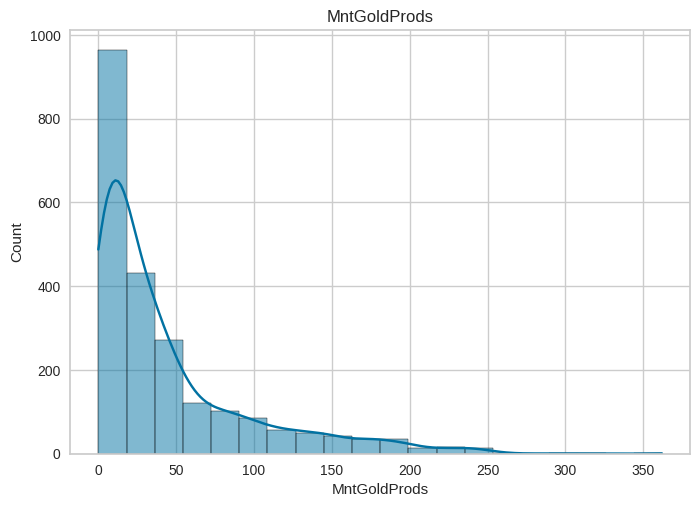

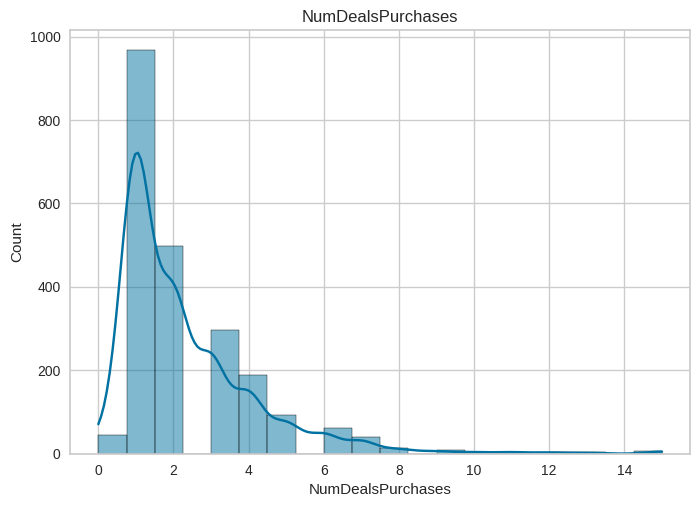

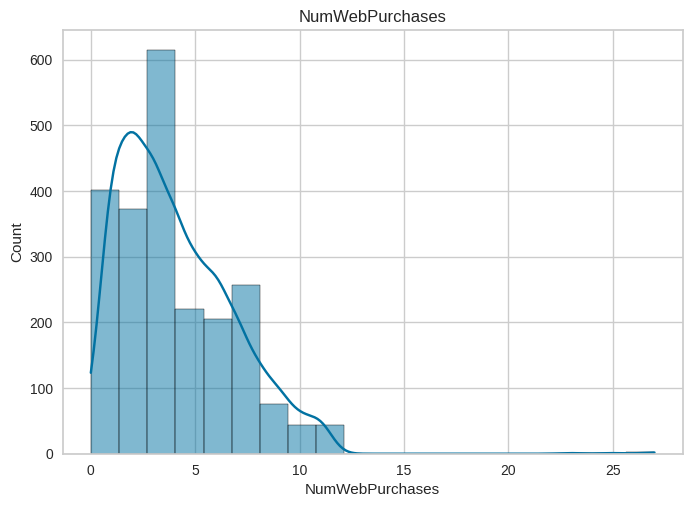

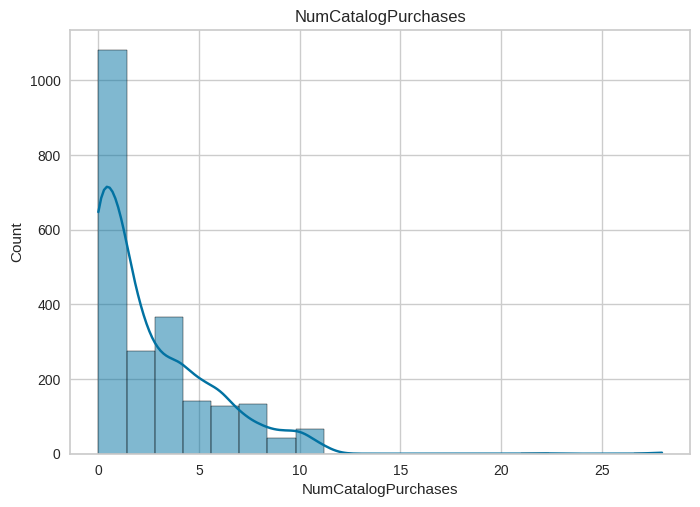

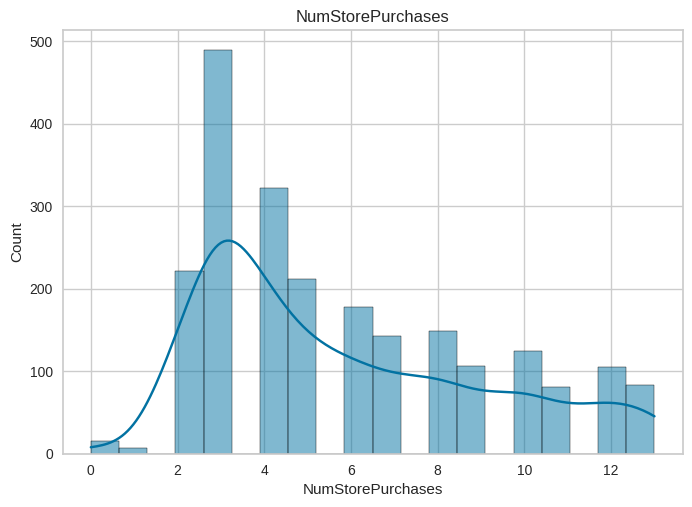

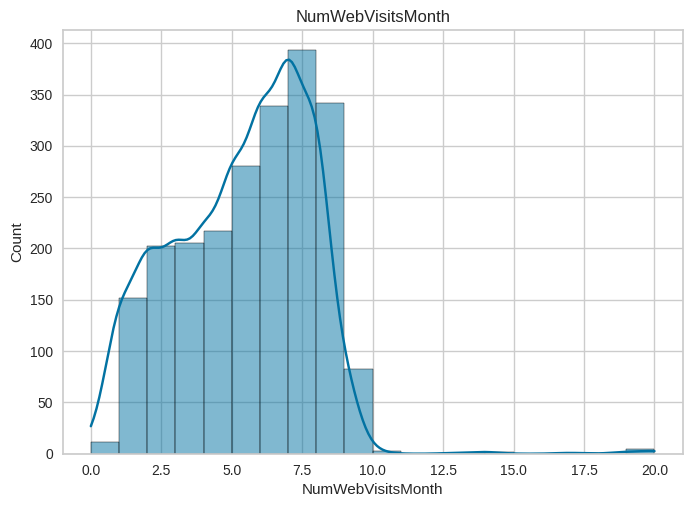

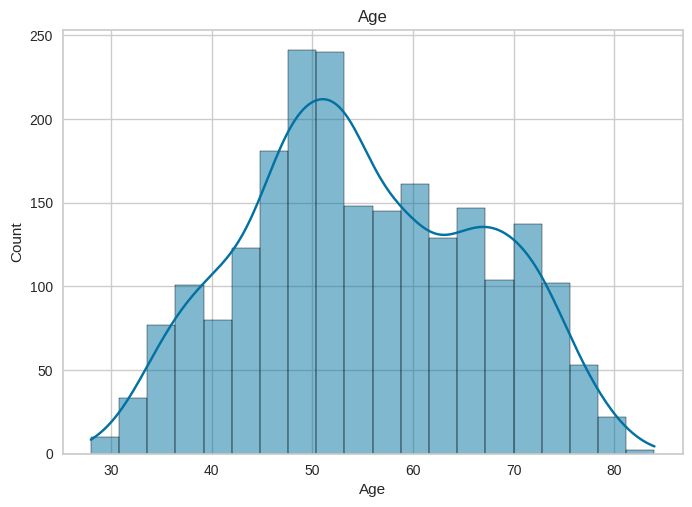

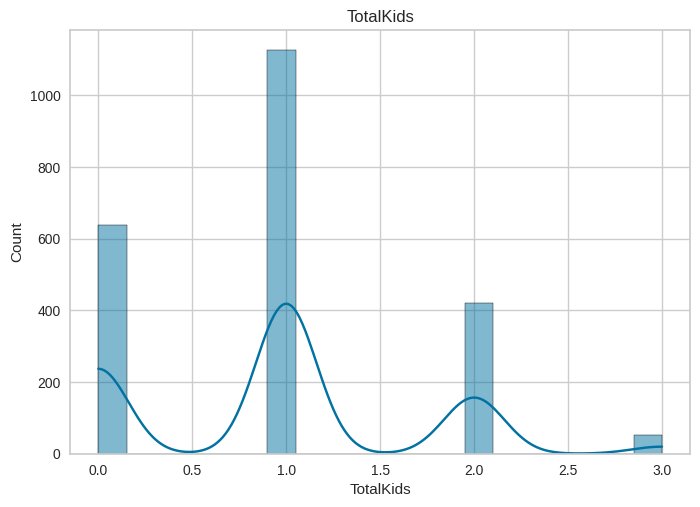

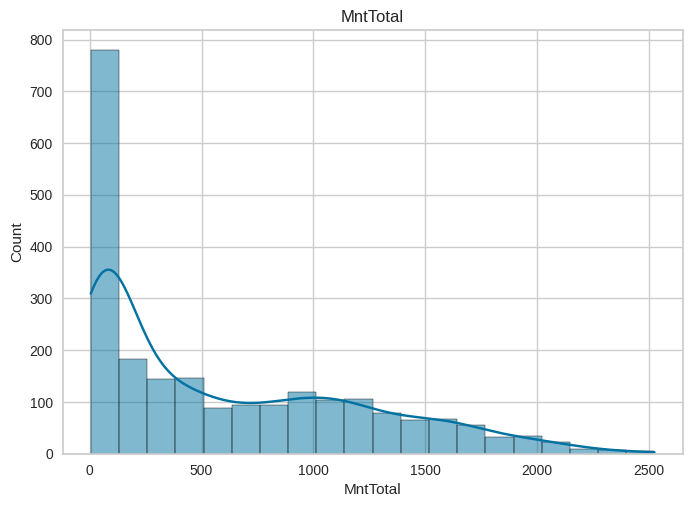

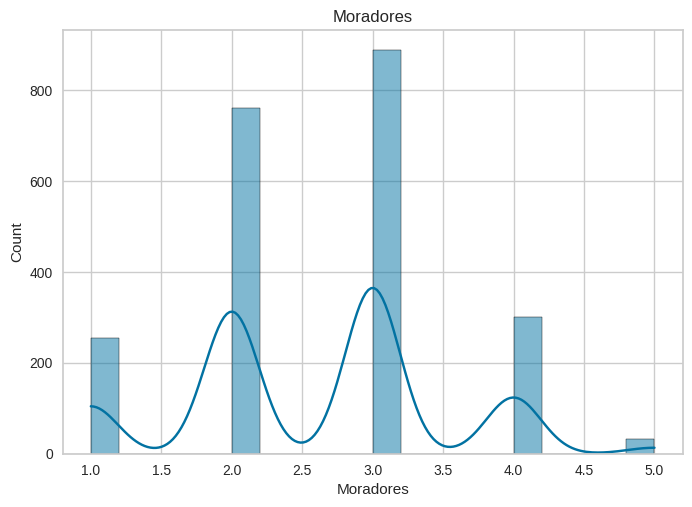

In [1066]:
for col in numericas.columns:
  sns.histplot(numericas[col], bins=20, kde=True) # histograma para cada uma das variaveis numéricas
  plt.title(col)
  plt.show()

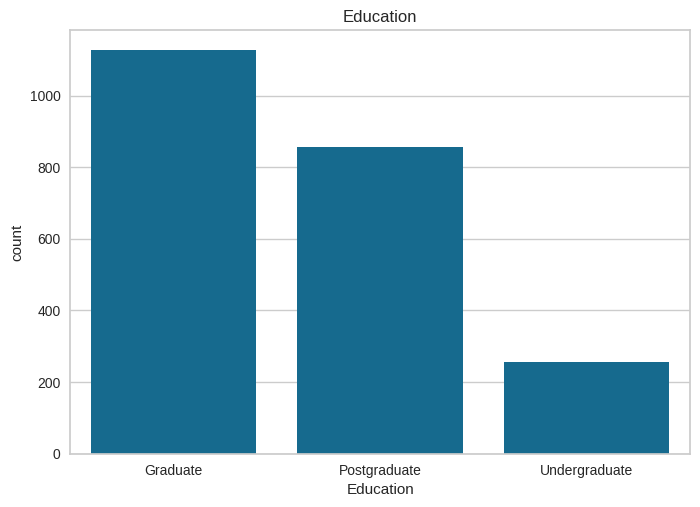

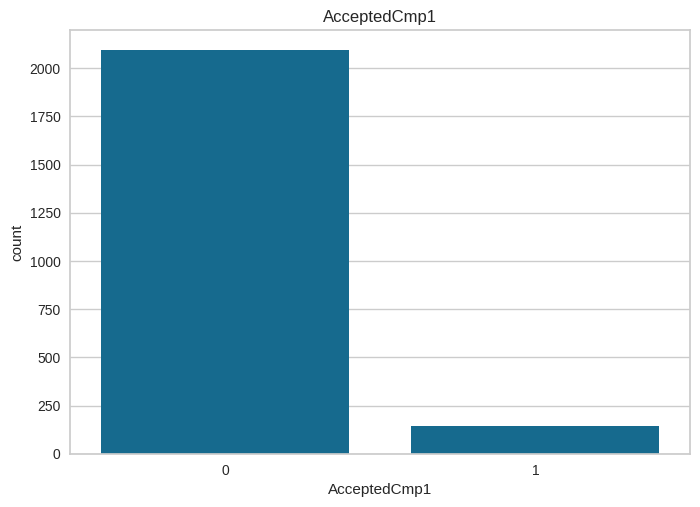

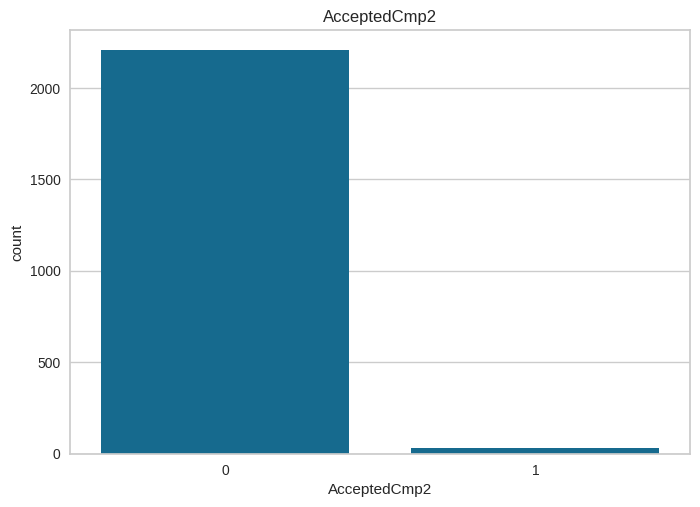

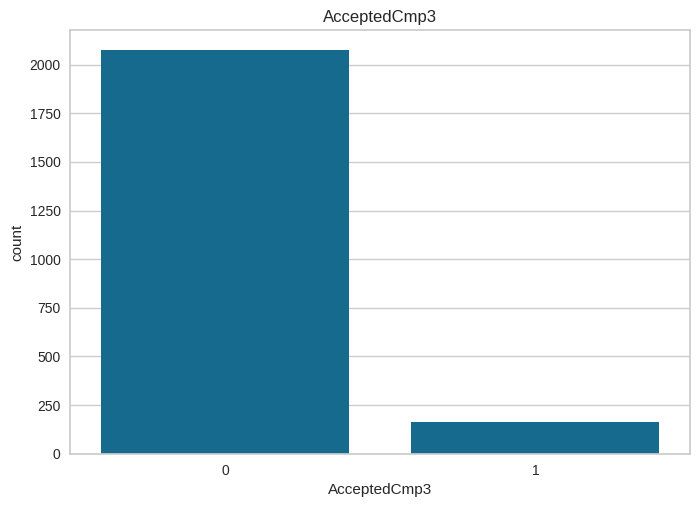

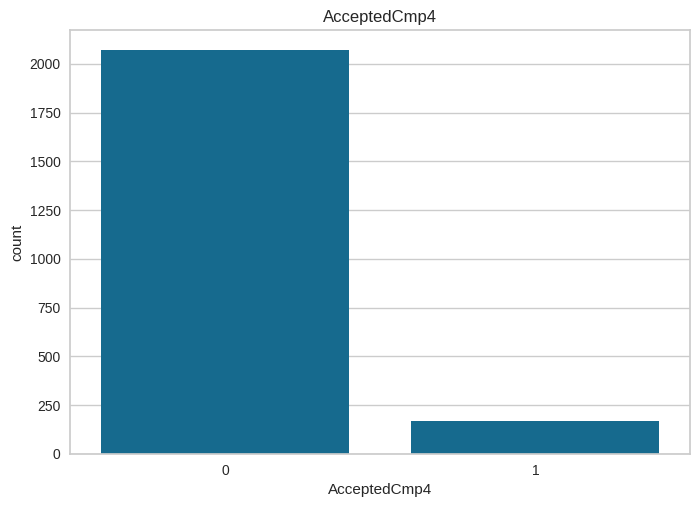

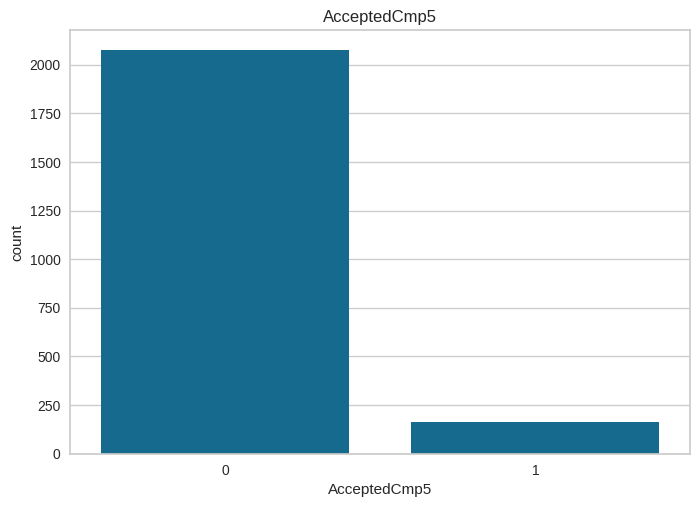

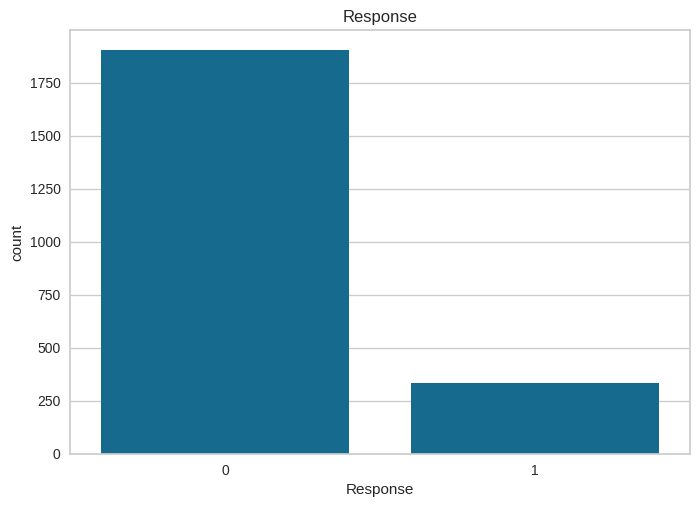

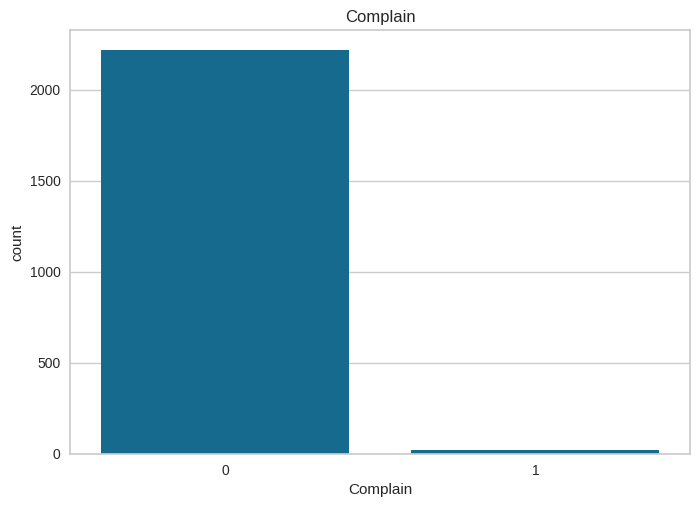

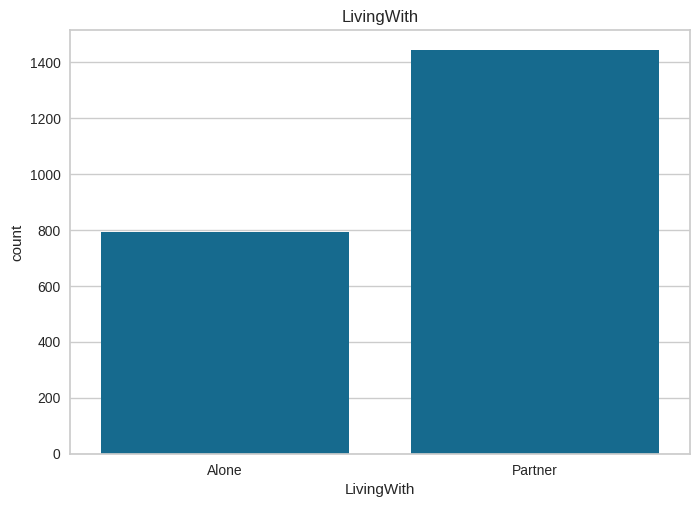

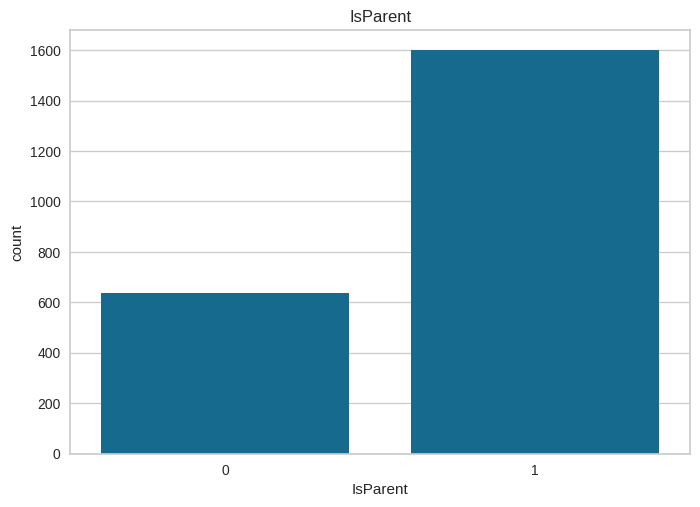

In [1067]:
for col in categoricas.columns:
  sns.countplot(categoricas, x = col) # countplot para cada uma das categoricas
  plt.title(col)
  plt.show()

<Axes: xlabel='Income', ylabel='MntTotal'>

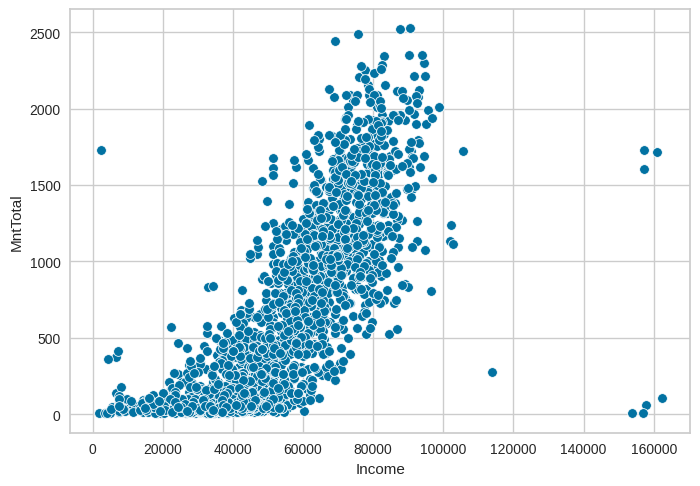

In [1068]:
sns.scatterplot(data=df, x='Income', y='MntTotal') # verificando a relação entre ganhos e gastos

<Axes: xlabel='TotalKids', ylabel='MntTotal'>

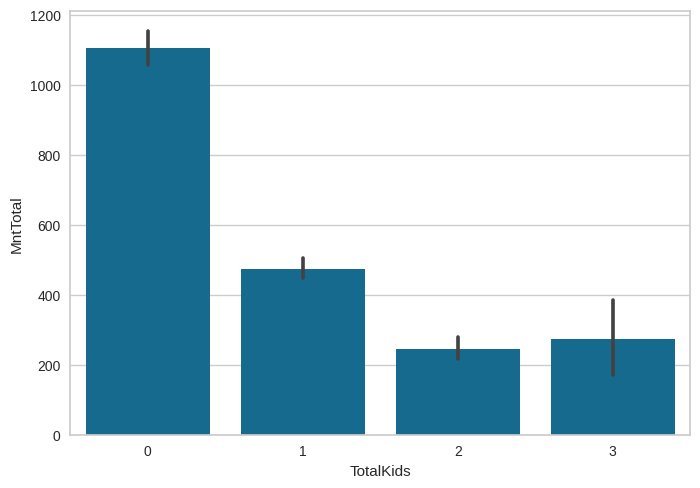

In [1069]:
sns.barplot(data=df, x='TotalKids', y='MntTotal')  # ganhos x nro kids

<Axes: xlabel='Moradores', ylabel='MntTotal'>

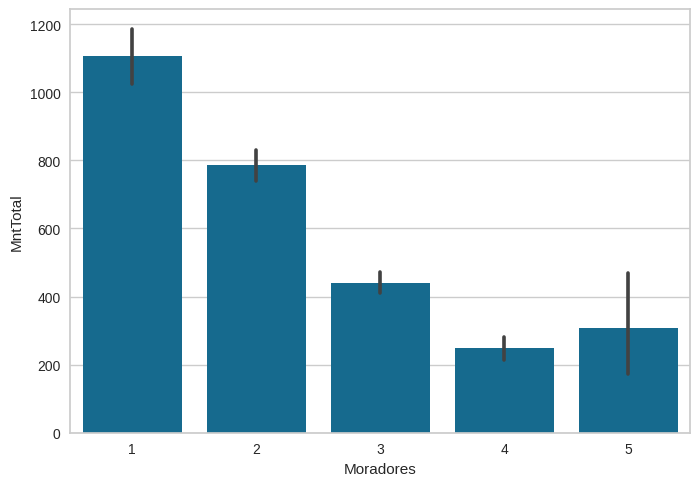

In [1070]:
sns.barplot(data=df, x='Moradores', y='MntTotal') # mordadores x gastos

<Axes: xlabel='Education', ylabel='MntTotal'>

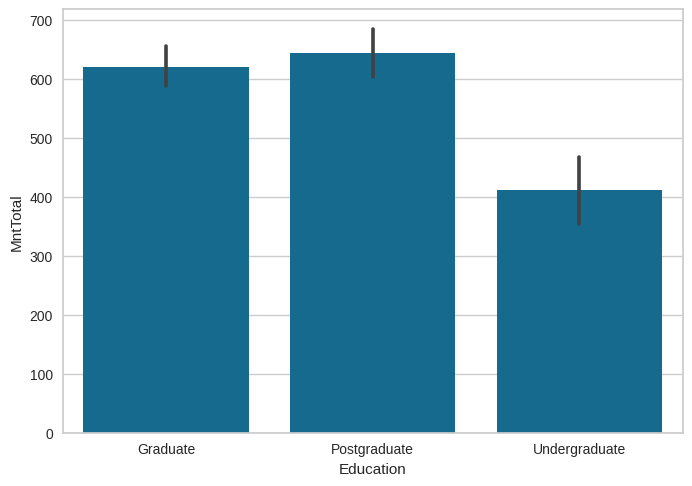

In [1071]:
sns.barplot(data=df, x='Education', y='MntTotal')

In [1072]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'TotalKids', 'MntTotal',
       'LivingWith', 'Moradores', 'IsParent'],
      dtype='object')

In [1073]:
for col in numericas.columns:  # verificando valores de min e max, verificando se ta tudo certo.
  print(col, df[col].max())
  print(col, df[col].min())

Income 162397.0
Income 1730.0
Kidhome 2
Kidhome 0
Teenhome 2
Teenhome 0
Recency 99
Recency 0
MntWines 1493
MntWines 0
MntFruits 199
MntFruits 0
MntMeatProducts 1725
MntMeatProducts 0
MntFishProducts 259
MntFishProducts 0
MntSweetProducts 263
MntSweetProducts 0
MntGoldProds 362
MntGoldProds 0
NumDealsPurchases 15
NumDealsPurchases 0
NumWebPurchases 27
NumWebPurchases 0
NumCatalogPurchases 28
NumCatalogPurchases 0
NumStorePurchases 13
NumStorePurchases 0
NumWebVisitsMonth 20
NumWebVisitsMonth 0
Age 84
Age 28
TotalKids 3
TotalKids 0
MntTotal 2525
MntTotal 5
Moradores 5
Moradores 1


In [1074]:
df['Graduated'] = df['Education'].replace({'Postgraduate':2,'Graduate':1, 'Undergraduate':0})
df.drop(columns=['Education'], inplace=True)

<ipython-input-1074-495b9ce8e2cf>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Graduated'] = df['Education'].replace({'Postgraduate':2,'Graduate':1, 'Undergraduate':0})


In [1075]:
df['LivingWith'] = df['LivingWith'].replace({'Alone':0, 'Partner':1})

<ipython-input-1075-06f89a6cd7d9>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LivingWith'] = df['LivingWith'].replace({'Alone':0, 'Partner':1})


<Axes: >

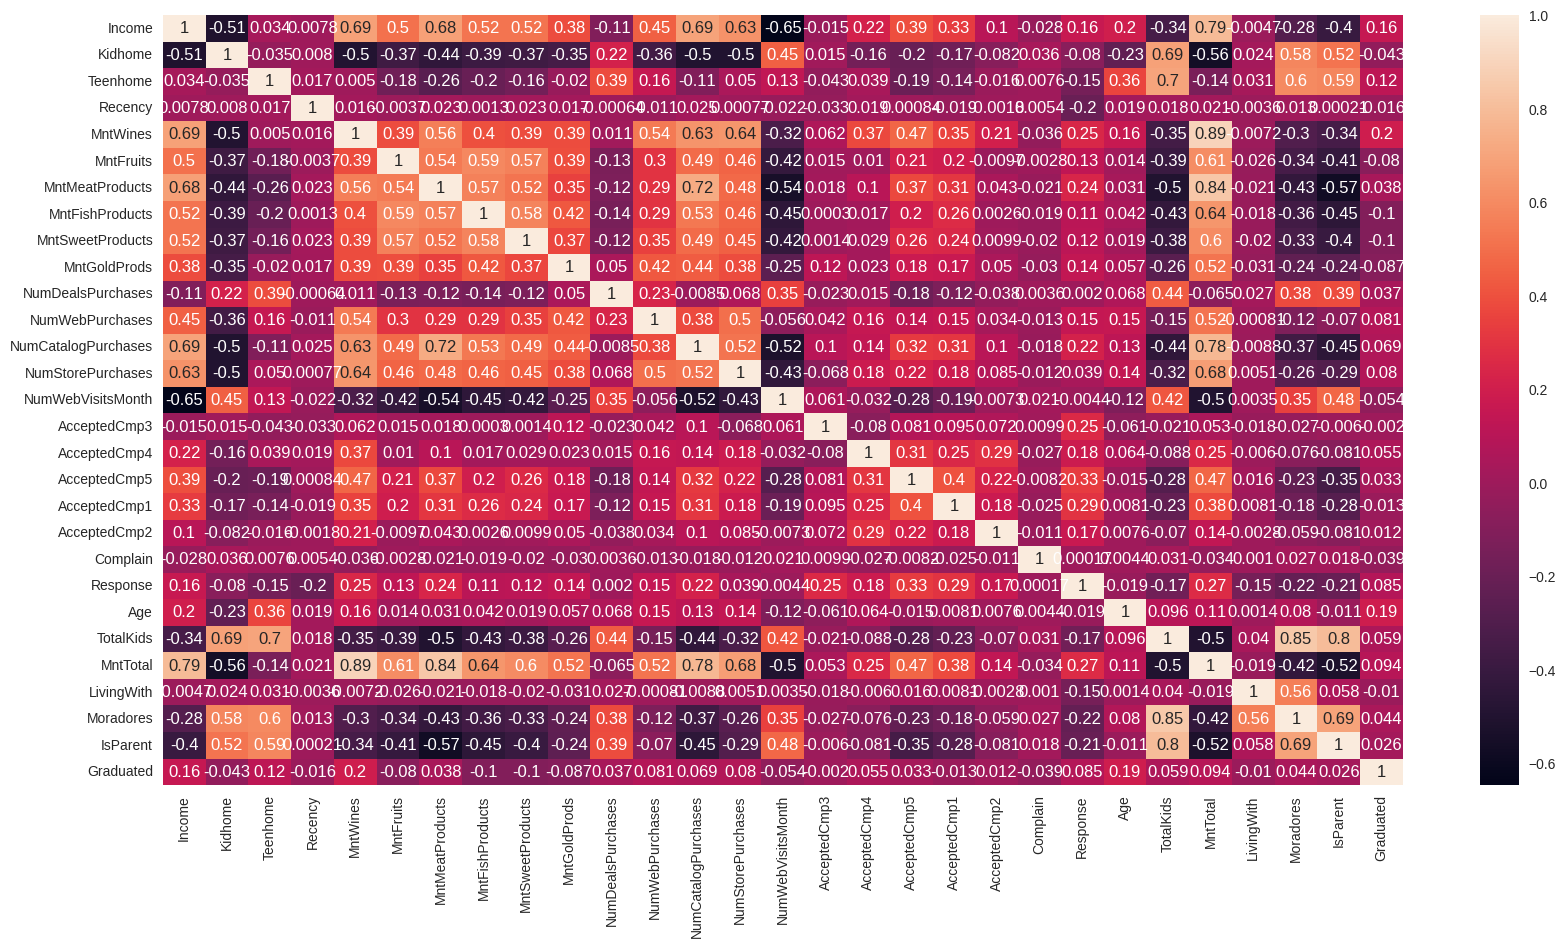

In [1076]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True)

In [1077]:
# É possivel observar que temos muitas variaveis com correlação fraca,
# mas acho importante deixar elas ai para que o PCA faça o redimensionamento.

### Step 4: Data Preprocessing
Steps:
- Select relevant features.
- Normalize the data.

Bom, neste tópico optei por utilizar o StandardScaler para padronizar o dataset e o PCA para reduzir a dimensionalidade do dataset, selecionando somente as melhores variáveis para o cluster.

https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html

#### Padronizando os dados

In [1078]:
df1 = df.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df1)
df_scaled = scaler.transform(df1)
df_scaled = pd.DataFrame(df_scaled, columns=df1.columns)
df_scaled.describe(include = 'all')

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp2,Complain,Response,Age,TotalKids,MntTotal,LivingWith,Moradores,IsParent,Graduated
count,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,...,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03
mean,-8.262125e-17,3.416071e-17,1.906644e-17,-7.149916e-17,-7.944351e-18,-5.561046e-18,-3.177740e-17,4.289949e-17,2.065531e-17,4.766610e-18,...,-2.065531e-17,1.588870e-17,-2.224418e-17,6.514368e-17,7.944351e-17,4.766610e-18,9.692108e-17,2.192641e-16,-1.461761e-16,4.131062e-17
std,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,...,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00
min,-2.346114e+00,-8.249389e-01,-9.306153e-01,-1.696543e+00,-9.037519e-01,-6.616104e-01,-7.400464e-01,-6.870194e-01,-6.558568e-01,-8.450157e-01,...,-1.166159e-01,-9.500143e-02,-4.190521e-01,-2.316276e+00,-1.264308e+00,-9.987636e-01,-1.347635e+00,-1.758810e+00,-1.584362e+00,-1.946873e+00
25%,-7.684528e-01,-8.249389e-01,-9.306153e-01,-8.675502e-01,-8.324330e-01,-6.364311e-01,-6.691367e-01,-6.321109e-01,-6.316380e-01,-6.721048e-01,...,-1.166159e-01,-9.500143e-02,-4.190521e-01,-6.924366e-01,-1.264308e+00,-8.924037e-01,-1.347635e+00,-6.565959e-01,-1.584362e+00,-4.118913e-01
50%,-2.707205e-02,-8.249389e-01,-9.306153e-01,-4.016436e-03,-3.866896e-01,-4.601758e-01,-4.431121e-01,-4.673854e-01,-4.621065e-01,-3.839200e-01,...,-1.166159e-01,-9.500143e-02,-4.190521e-01,-9.417994e-02,6.541573e-02,-3.481402e-01,7.420405e-01,4.456177e-01,6.311687e-01,-4.118913e-01
75%,7.625296e-01,1.032627e+00,9.059742e-01,8.595173e-01,5.946886e-01,1.693073e-01,2.881439e-01,2.281224e-01,1.433631e-01,2.308744e-01,...,-1.166159e-01,-9.500143e-02,-4.190521e-01,8.459377e-01,6.541573e-02,7.304157e-01,7.420405e-01,4.456177e-01,6.311687e-01,1.123090e+00
max,5.159346e+00,2.890194e+00,2.742564e+00,1.723051e+00,3.532880e+00,4.349075e+00,6.904903e+00,4.053415e+00,5.713683e+00,6.109845e+00,...,8.575158e+00,1.052616e+01,2.386338e+00,2.469777e+00,2.724862e+00,3.189157e+00,7.420405e-01,2.650045e+00,6.311687e-01,1.123090e+00


<Axes: >

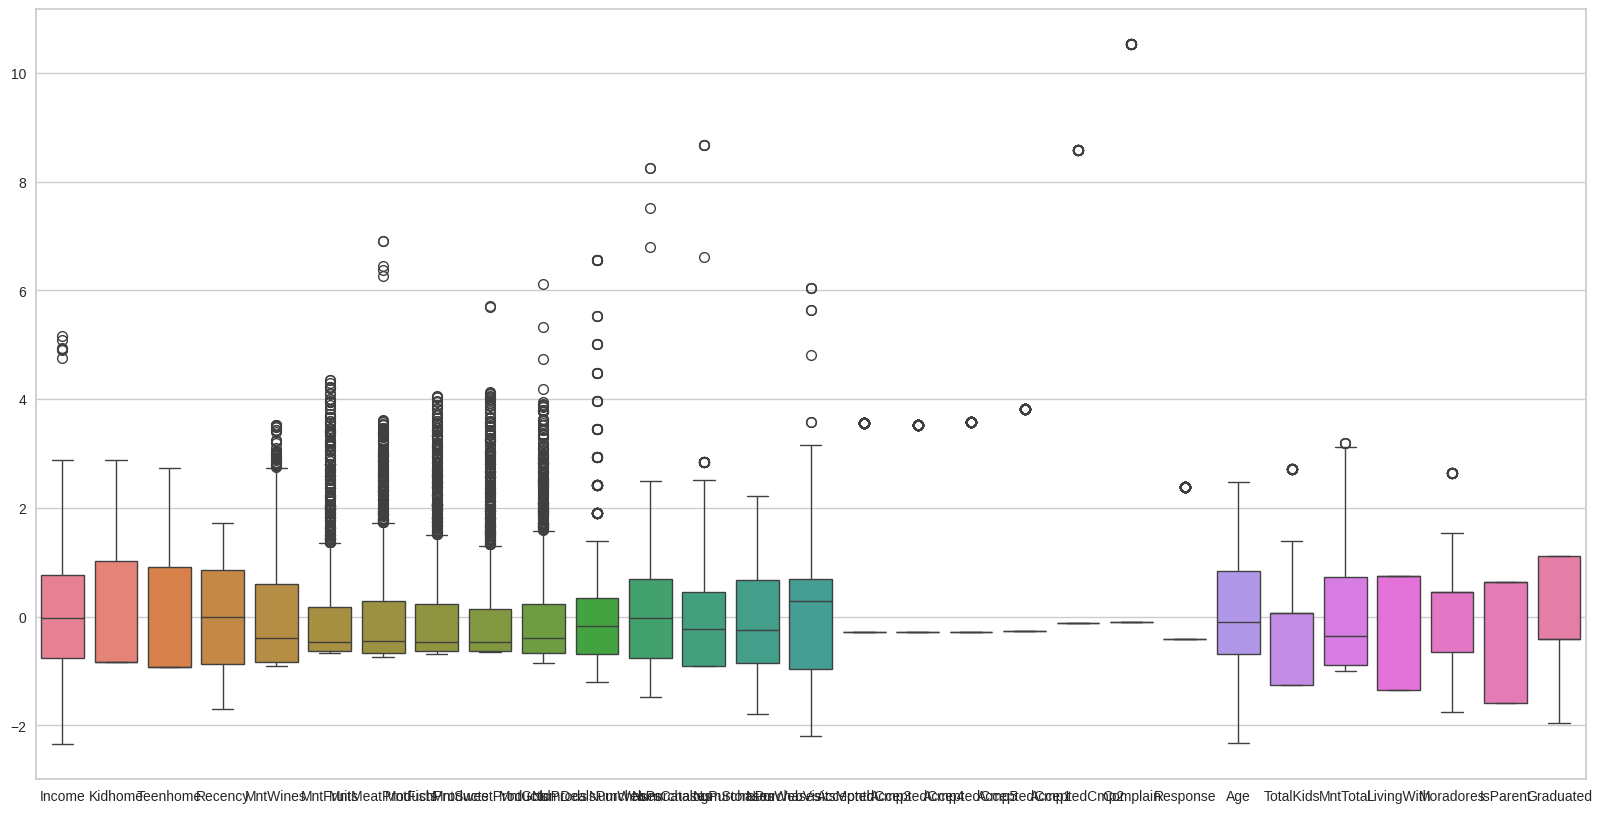

In [1079]:
plt.figure(figsize = (20,10))
sns.boxplot(data = df_scaled)

<Axes: >

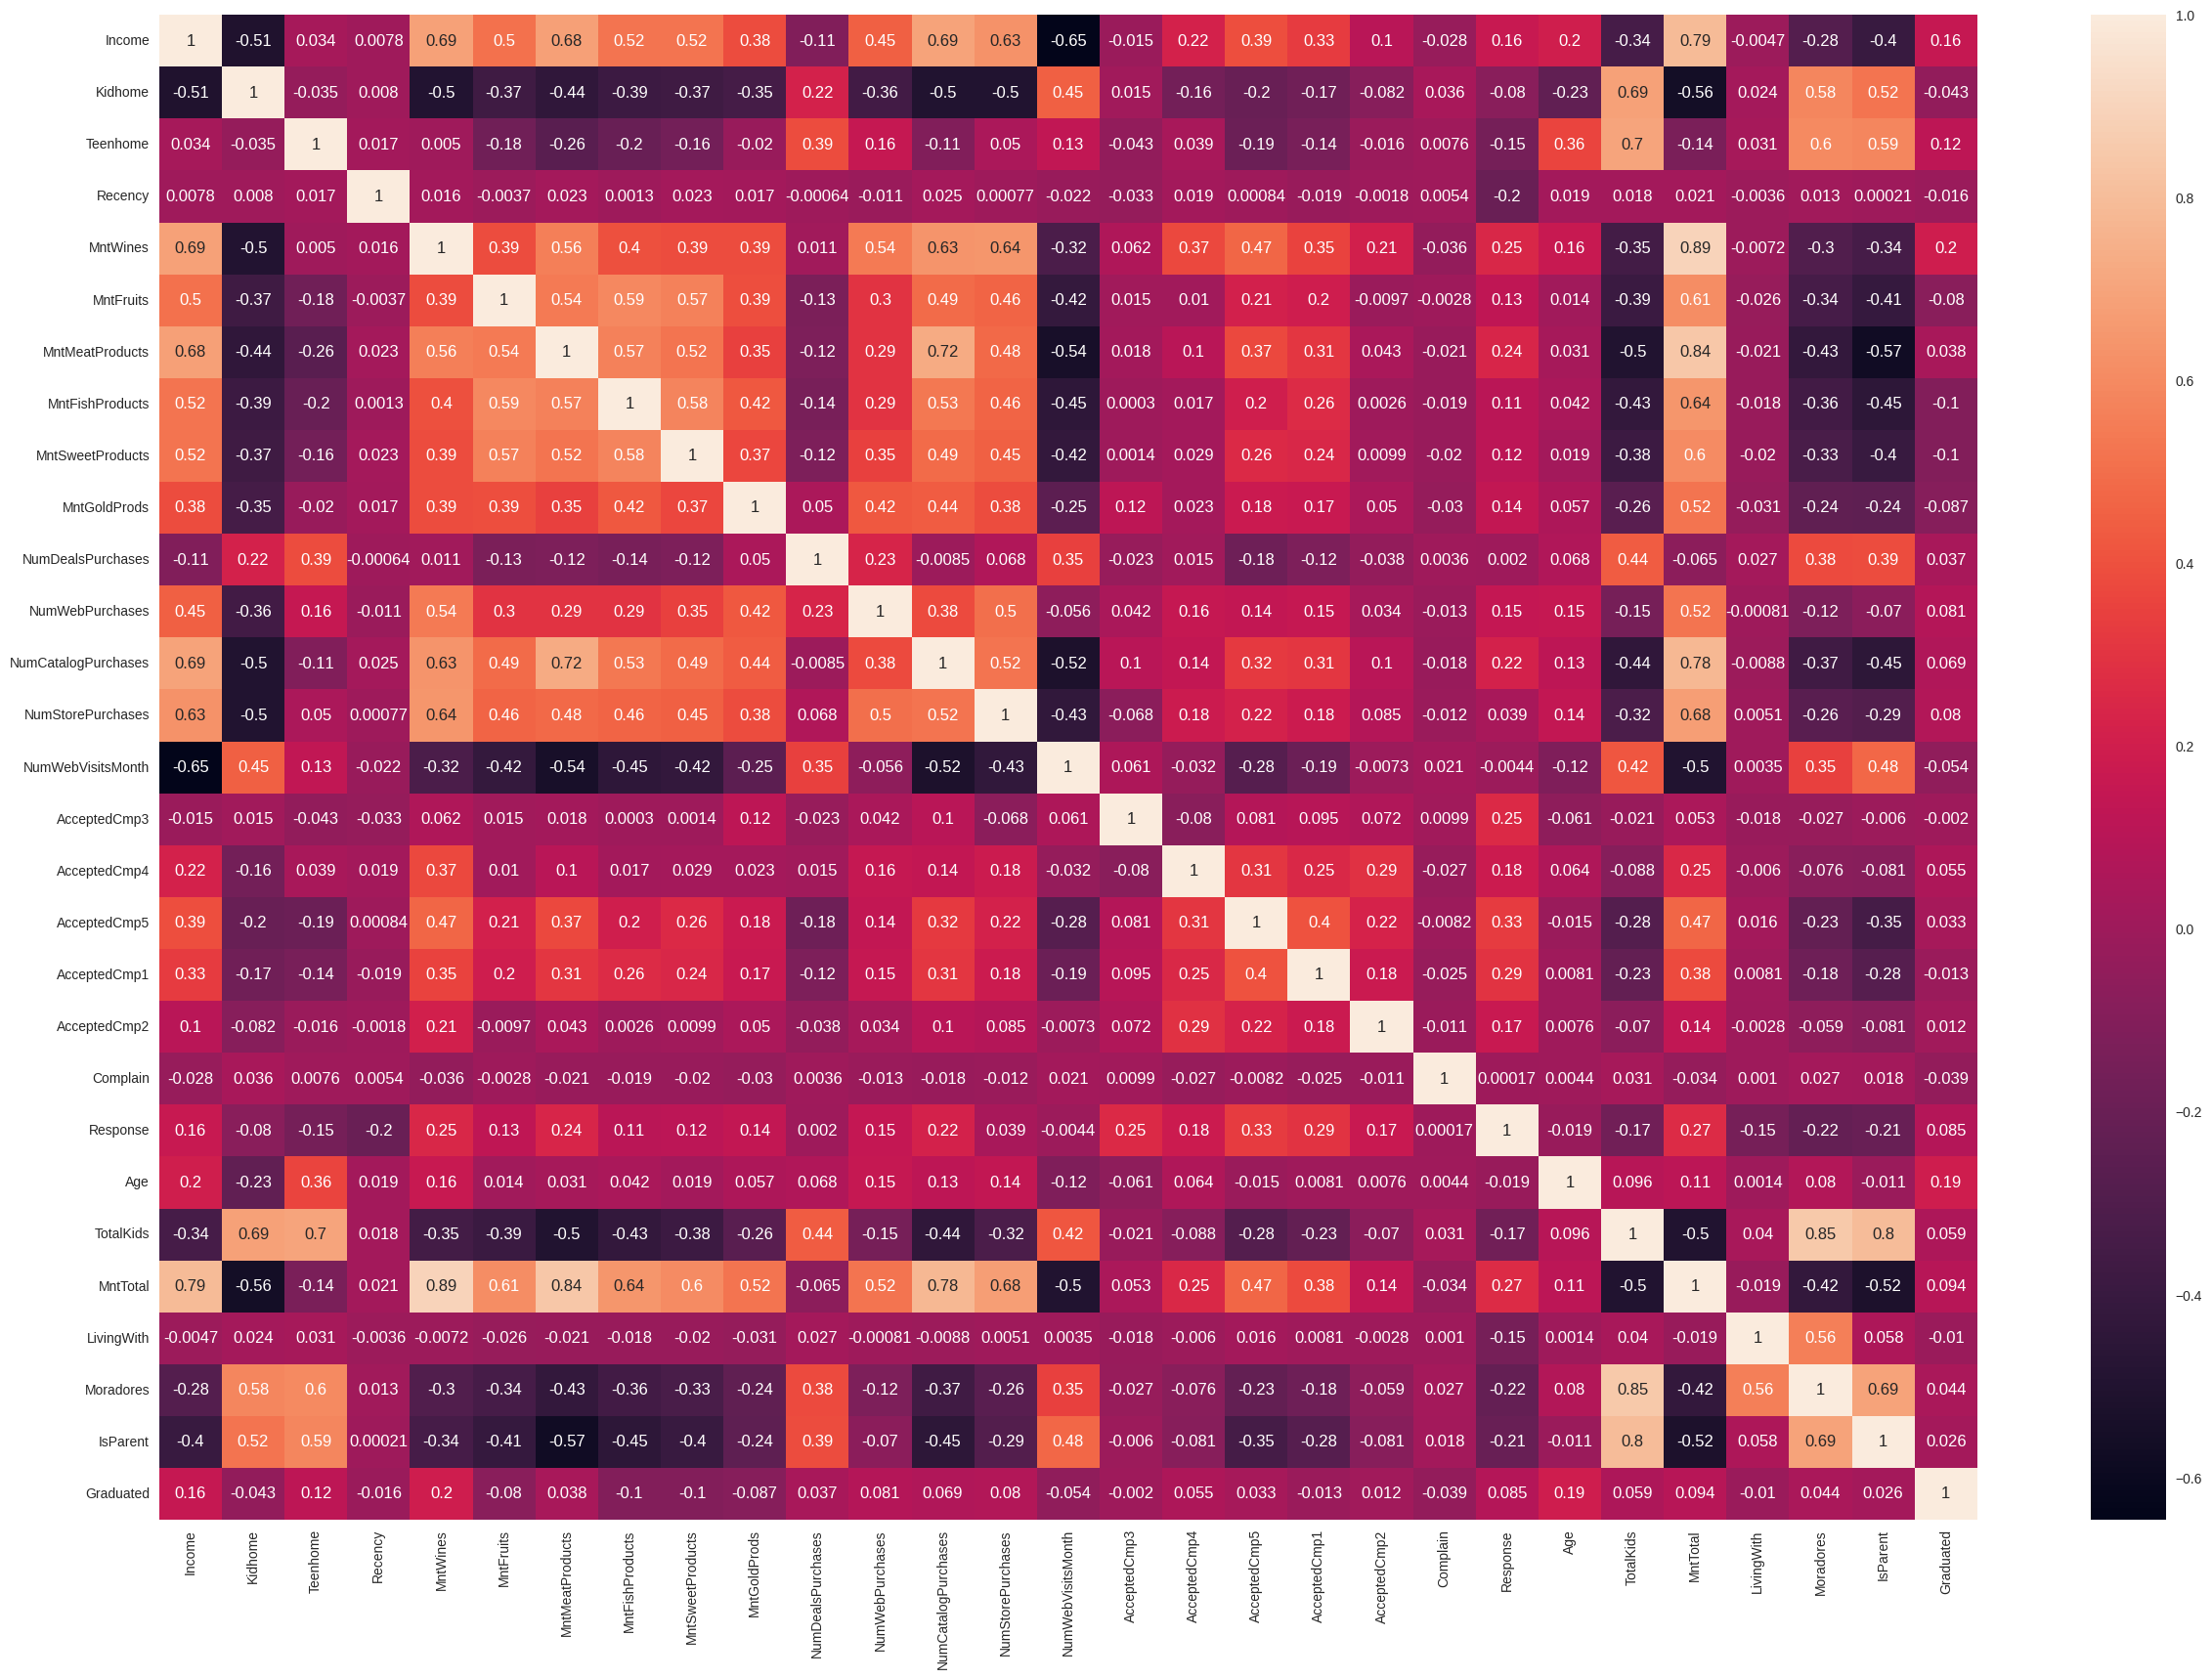

In [1080]:
plt.figure(figsize = (30,20))
sns.heatmap(df_scaled.corr(), annot=True)

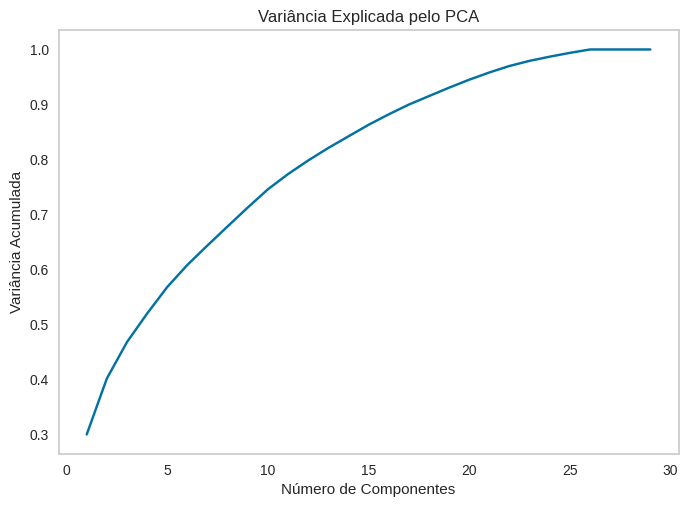

In [1081]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(df_scaled)  # `df_scaled` é o dataset normalizado

# variância explicada por cada componente
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# visualizando a variância acumulada
import matplotlib.pyplot as plt
plt.plot(range(1, len(explained_variance)+1), explained_variance)
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Acumulada')
plt.title('Variância Explicada pelo PCA')
plt.grid()
plt.show()


In [1082]:
pca = PCA(random_state = 42, svd_solver = 'full')
pca.fit(df_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
aux = np.argmax(cumsum >= 0.95) # eu quero pegar o nro de componentes cujo soma das variâncias seja >= 95

In [1083]:
aux

20

In [1084]:
cumsum[20]

0.9582325288920731

In [1085]:
cumsum[19] # 19 ficou um valor bom, acredito eu

0.9450598824510332

In [1086]:
pca = PCA(n_components = 19, random_state = 42, svd_solver = 'full')
pca.fit(df_scaled)
df_pca = pd.DataFrame(pca.transform(df_scaled), columns = (['col1', 'col2', 'col3', 'col4',
                                                                  'col5', 'col6', 'col7', 'col8',
                                                                  'col9', 'col10', 'col11', 'col12',
                                                                  'col13', 'col14', 'col15', 'col16',
                                                                  'col17', 'col18', 'col19']))
df_pca.head()


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19
0,4.855362,-0.666256,-0.286606,-1.582605,-2.244630,0.064493,0.355093,-0.295858,-0.316994,0.116938,-1.040116,2.596061,-0.212984,-1.086757,-0.269979,0.134947,0.402776,-1.265796,-0.085285
1,-2.915417,0.127385,-0.112841,0.840797,-0.434679,0.672282,1.202469,-0.136246,-0.827700,-1.652564,-0.094202,0.207141,-0.425664,-0.005555,0.196535,-0.082989,-0.641296,-0.292064,0.115847
2,2.353380,-0.810433,-1.171759,0.439372,-0.060214,-0.167108,-1.634302,0.987649,0.172401,0.188799,-0.114218,-0.086780,0.557101,-0.013330,-0.341234,-0.340965,-0.491054,-0.420019,-0.276032
3,-2.700690,-1.457785,0.055207,-0.620145,0.968138,-0.141095,-0.948639,0.071561,-0.572067,0.348868,0.414241,-0.329171,0.028217,0.215662,-0.020603,-0.005256,-0.142516,0.007854,0.041688
4,-0.729837,0.408131,-0.608087,-0.494125,0.847051,-0.487161,0.321268,-1.429459,0.017465,1.913465,0.468502,0.593521,0.473497,0.120581,-0.347117,0.068404,0.307553,0.608231,0.293633


### Step 5: Machine Learning
Tasks:
- Determine the optimal number of clusters using the elbow method.
- Train a model.
- Visualize the resulting

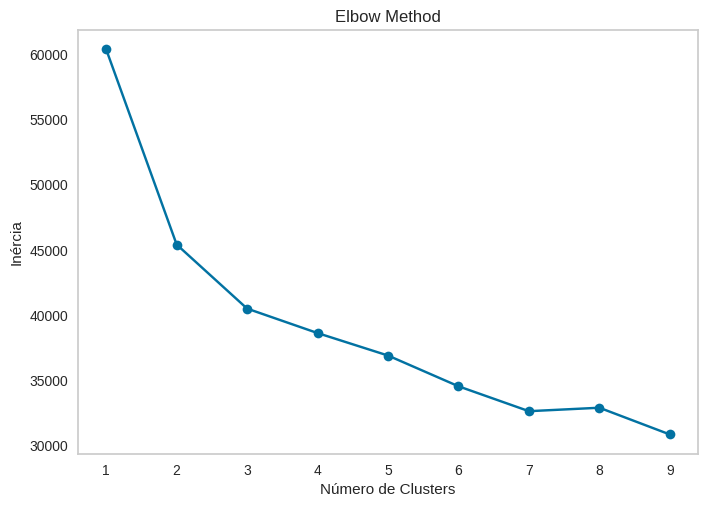

In [1088]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df_pca
# agora vou fazer os clusters.
inertias = []
for k in range(1, 10): # começando com 2 vizinhos até 9 vizinhos
    kmeans = KMeans(n_clusters=k, random_state=42) # para cada valor de k
    kmeans.fit(X)  # kmeans fit
    inertias.append(kmeans.inertia_) # valor da inércia

plt.plot(range(1, 10), inertias, marker='o') # 2 a 9 vizinhos, label y inércia.
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Elbow Method')
plt.grid()
plt.show()

Foi possível observar que o cotovelo ocorre no k = 2, o que nos permite ter uma noção de que este valor é um bom candidato para ser o melhor k. Mas, acredito que o metodo silhouette score seja mais imporante para definir isso.

### Step 6: Evaluation
- Use silhouette scores or other metrics to evaluate the quality of the clusters.
- Interpret the results.

In [1090]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

for k in range(2,10): # melhores valores entre 2 e 9
  kmeans = KMeans(n_clusters = k, random_state= 42)
  predict = kmeans.fit_predict(X)
  score = silhouette_score(X, predict) # valor do score do metodo silhueta
  print(f'Silhouette Score for k = {k}: {score}')

Silhouette Score for k = 2: 0.2718317879920958
Silhouette Score for k = 3: 0.19558537329057263
Silhouette Score for k = 4: 0.12910000647735292
Silhouette Score for k = 5: 0.1158328910214054
Silhouette Score for k = 6: 0.13025500531219866
Silhouette Score for k = 7: 0.13827018032160948
Silhouette Score for k = 8: 0.12647989905149543
Silhouette Score for k = 9: 0.13304967359937442


Dentre esses valores, de 2 a 9, o nro de clusters que possui o maior score foi o de 2 clusters.

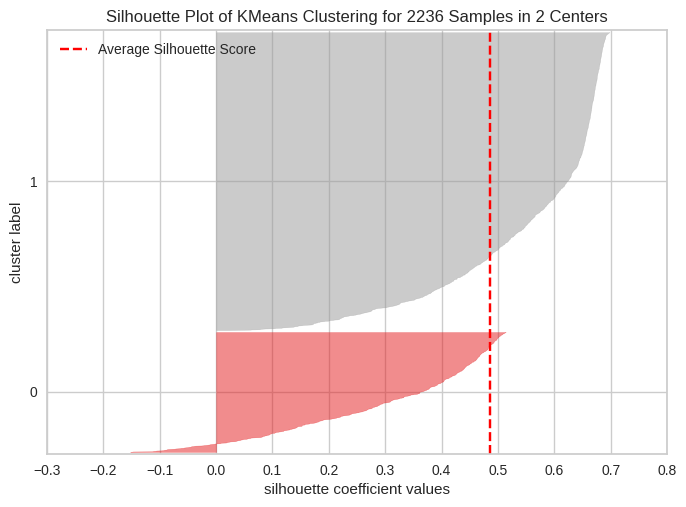

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2236 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [1091]:
sil = SilhouetteVisualizer(KMeans(2), metric='silhouette') # vamos visualizar com esse silhouette vizualizer como ele fica.
sil.fit(kmeans.fit_transform(X))
sil.show()

<ipython-input-1092-cfd3fb057743>:18: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(df2, x = 'PC1', y = 'PC2', hue = 'Cluster', palette = sns.color_palette('pastel'), alpha = 0.7)


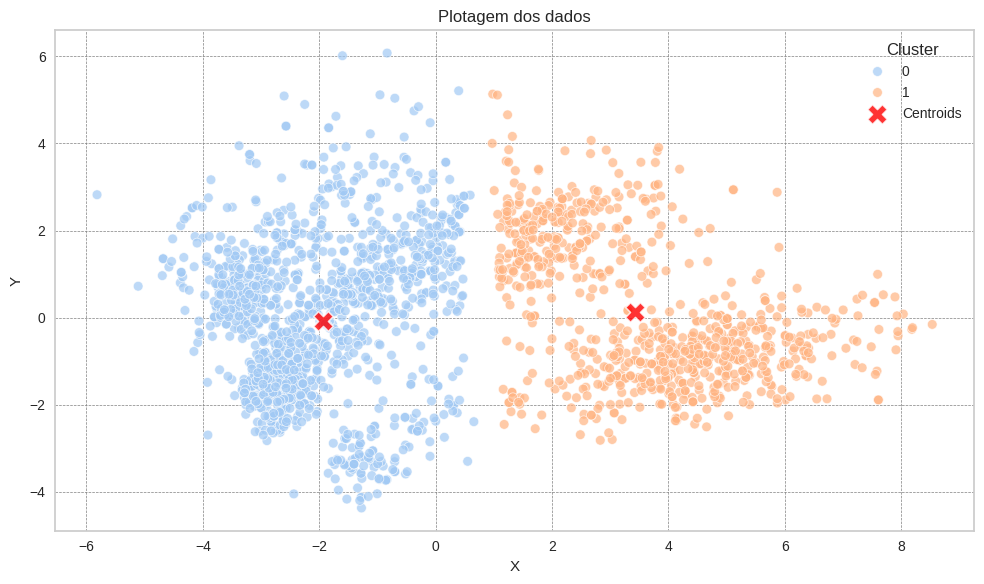

In [1092]:
kmeans = KMeans(n_clusters= 2, random_state=42) # Valor de K que foi dado pelo silhouette.
cluster_labels = kmeans.fit_predict(df_pca)
df1['Cluster'] = cluster_labels
df2 = df1.copy()

scaler1 = StandardScaler() # usando standard scaler para padronizar os dados
normalized_data = scaler1.fit_transform(df2)

pca = PCA(n_components=2) # reduzindo a dimensionalidade para 2, sendo possivel assim, visualizar os clusters.
pca_data = pca.fit_transform(normalized_data)

df2['PC1'] = pca_data[:, 0]
df2['PC2'] = pca_data[:, 1]


plt.figure(figsize = (10, 6))

sns.scatterplot(df2, x = 'PC1', y = 'PC2', hue = 'Cluster', palette = sns.color_palette('pastel'), alpha = 0.7)

plt.title("Plotagem dos dados")
plt.xlabel("X")
plt.ylabel("Y")

plt.grid(True)
plt.tight_layout()

plt.legend(title="Cluster", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

sns.scatterplot(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], marker = 'X', s = 200, color = 'red', label = 'Centroids', alpha = 0.8)
plt.legend(title = 'Cluster')

plt.show()

Os clusters ficaram separados usando esse valor de K, portanto, realmente acredito que o melhor valor de K clusters seja 2.

<ipython-input-1093-7bde0b8e69d6>:18: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(df2, x = 'PC1', y = 'PC2', hue = 'Cluster', palette = sns.color_palette('pastel'), alpha = 0.7)


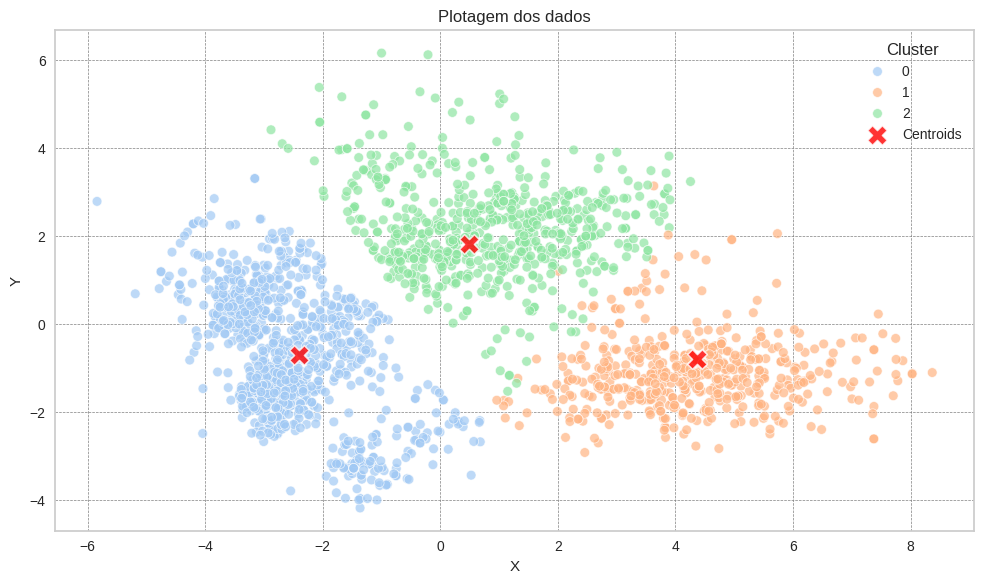

In [1093]:
kmeans = KMeans(n_clusters= 3, random_state=42) # mesmo gráfico, mas agora eu estou utilizando K = 3
cluster_labels = kmeans.fit_predict(df_pca)
df1['Cluster'] = cluster_labels
df2 = df1.copy()

scaler1 = StandardScaler() # usando standard scaler para padronizar os dados
normalized_data = scaler1.fit_transform(df2)

pca = PCA(n_components=2) # reduzindo a dimensionalidade para 2, sendo possivel assim, visualizar os clusters.
pca_data = pca.fit_transform(normalized_data)

df2['PC1'] = pca_data[:, 0]
df2['PC2'] = pca_data[:, 1]


plt.figure(figsize = (10, 6))

sns.scatterplot(df2, x = 'PC1', y = 'PC2', hue = 'Cluster', palette = sns.color_palette('pastel'), alpha = 0.7)

plt.title("Plotagem dos dados")
plt.xlabel("X")
plt.ylabel("Y")

plt.grid(True)
plt.tight_layout()

plt.legend(title="Cluster", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

sns.scatterplot(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], marker = 'X', s = 200, color = 'red', label = 'Centroids', alpha = 0.8)
plt.legend(title = 'Cluster')

plt.show()

### Step 7: Insights

- Propose potential business insights or applications based on the identified clusters.
- Defend your ideas and explain the lessons learned.

Acredito que com os clusters identificados, podemos verificar que existem distintos grupos de clientes, que devido as diversas realidades podem optar por consumir mais determinadas coisas ou não. Como podemos observar que foi possível agrupar clientes com características parecidas, basta o investimetno por parte da equipe em identificar quais os tipos de comerciais, propagandas ou eventos podem fidelizar ainda mais esses clientes, fazendo-os consumir mais.
Além disso, é importante observar qual grupo que costumeiramente consome mais e quais as características comuns que predominam esse grupo, para que assim o investimento seja mais direcionado e especializado.
Em geral, o conhecimento adquirido nesse trabalho foi enriquecedor, me ajudou a compreender conceitos novos e me fez evoluir muito na área. Estou disposto a enfrentar mais desafios como esse e aprender coisas novas.